# Preprocessing - ADM

In [1]:
import os
from datetime import date
import pandas as pd
import datetime as dt
import logging
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
today = date.today()
str(today)

'2021-01-29'

In [3]:
home_dir = str(Path.home())
work_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Aging Decision Making R01/data/actigraphy')
in_dir= os.path.join(work_dir, 'raw')
out_dir = os.path.join(work_dir, 'processed_' + today)

if os.path.isdir(out_dir):
    print("ouput directory exists")
else:
    os.mkdir(out_dir)

In [ ]:
recording_period_min = 7 # days
interpolate_limit = 20 # SR = 1/30s, so 10 minute limit

from Wearables import preproc
for in_file in sorted(os.listdir(in_dir)):
    if in_file.endswith('.csv'):
        preproc(in_file, out_dir, recording_period_min, interpolate_limit)

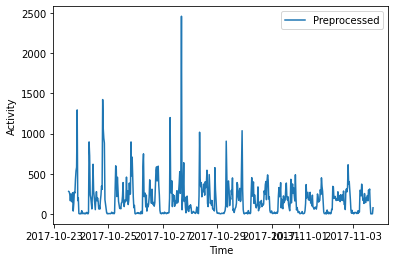

In [11]:
import glob

procfile = glob.glob(out_dir + '/*.csv')[0]

proc = pd.read_csv(procfile, header = None, names = ['Time', 'Activity'])
proc['Time'] = pd.to_datetime(proc['Time'])
proc = proc.set_index('Time')
proc = proc.resample('30T').mean()

plt.plot(proc.index, proc['Activity'], label='Preprocessed')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend()